In [2]:
#Stufe 4 – Fortgeschrittene Aufgaben

# Vorbereitung übernahme aus Aufgaben davor
# Kundenanalyse Stuffe 2
# Einfache Verknüpfung
# 4 **Lade beide CSV-Dateien ein.**  

import pandas as pd
df_Kunden = pd.read_csv("./csv/Kunden.csv", dtype={"PLZ" : str})
df_Zuordnung = pd.read_csv("./csv/zuordnung_plz_ort.csv", dtype={"plz" :str})

# 5. **Führe beide Tabellen über `PLZ` zusammen.**  
# merge

merged = pd.merge(
    df_Kunden,
    df_Zuordnung.drop_duplicates(subset="plz"),
    how="left",
    left_on="PLZ",
    right_on="plz"
)

print(len(df_Zuordnung))
print(len(df_Kunden))
print(len(merged))

12854
2500
2500


In [3]:
print(merged.columns)
print(list(merged.columns))

Index(['Vorname', 'Nachname', 'PLZ', 'Ort', 'osm_id', 'ags', 'ort', 'plz',
       'landkreis', 'bundesland'],
      dtype='object')
['Vorname', 'Nachname', 'PLZ', 'Ort', 'osm_id', 'ags', 'ort', 'plz', 'landkreis', 'bundesland']


In [4]:
# 12. **Erzeuge einen Report mit:**  
#    - Bundesland  
#   - Anzahl Kunden  
#   - Anzahl Orte  
#   - Häufigste PLZ je Bundesland

# 12. Report je Bundesland
report = merged.groupby("bundesland").agg(
    anzahl_kunden=("Vorname", "count"),
    anzahl_orte=("Ort", "nunique"),
    haeufigste_plz=("PLZ", lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)
print(report)


                        anzahl_kunden  anzahl_orte haeufigste_plz
bundesland                                                       
Baden-Württemberg                 261          217          71254
Bayern                            442          375          82024
Berlin                             37            1          10249
Brandenburg                        64           60          15306
Bremen                              9            2          28359
Hamburg                            15            1          22115
Hessen                             98           75          61440
Mecklenburg-Vorpommern            163          142          17209
Niedersachsen                     188          163          21423
Nordrhein-Westfalen               173          101          32469
Rheinland-Pfalz                   445          397          54518
Saarland                           11            8          66640
Sachsen-Anhalt                     34           29          39291
Schleswig-

In [5]:
# Anzahl aller eindeutigen Orte im gesamten DataFrame
anzahl_orte_gesamt = merged["Ort"].nunique()
print("Anzahl eindeutiger Orte insgesamt:", anzahl_orte_gesamt)

# Anzahl Datensätze ohne Bundesland
anzahl_ohne_bundesland = merged[merged["bundesland"].isna()]["Ort"].nunique()
print("Anzahl eindeutiger Orte ohne Bundesland:", anzahl_ohne_bundesland)

Anzahl eindeutiger Orte insgesamt: 2012
Anzahl eindeutiger Orte ohne Bundesland: 174


In [7]:
# der Report greift nicht auf alle Daten zu weil es Kunden ohne Bundesland gibt


In [7]:
# 13. **Exportiere Kunden gruppiert nach Bundesland als JSON-Datei.**  
#    Format:  
#   ```json
#    {
#     "Berlin": [ {…}, {…} ],
#     "NRW": [ {…} ]
#   }
import json

# 13. JSON-Export Grupierung nach Bundesland und Ditionary
kunden_json = merged.groupby("bundesland").apply(lambda d: d.to_dict(orient="records")).to_dict()
print(kunden_json)
# Als Datei speichern (optional)

with open("kunden_nach_bundesland.json", "w") as f:
    json.dump(kunden_json, f, indent=2)


{'Baden-Württemberg': [{'Vorname': 'Anna', 'Nachname': 'Weber', 'PLZ': '69242', 'Ort': 'Mühlhausen', 'osm_id': 453374.0, 'ags': 8226054.0, 'ort': 'Mühlhausen', 'plz': '69242', 'landkreis': 'Rhein-Neckar-Kreis', 'bundesland': 'Baden-Württemberg'}, {'Vorname': 'Anna', 'Nachname': 'Richter', 'PLZ': '88273', 'Ort': 'Fronreute', 'osm_id': 2808129.0, 'ags': 8436096.0, 'ort': 'Fronreute', 'plz': '88273', 'landkreis': 'Landkreis Ravensburg', 'bundesland': 'Baden-Württemberg'}, {'Vorname': 'Anna', 'Nachname': 'Lange', 'PLZ': '75337', 'Ort': 'Enzklösterle', 'osm_id': 911671.0, 'ags': 8235025.0, 'ort': 'Enzklösterle', 'plz': '75337', 'landkreis': 'Landkreis Calw', 'bundesland': 'Baden-Württemberg'}, {'Vorname': 'Anna', 'Nachname': 'Horn', 'PLZ': '69226', 'Ort': 'Nußloch', 'osm_id': 453398.0, 'ags': 8226060.0, 'ort': 'Nußloch', 'plz': '69226', 'landkreis': 'Rhein-Neckar-Kreis', 'bundesland': 'Baden-Württemberg'}, {'Vorname': 'Ben', 'Nachname': 'Wolf', 'PLZ': '71088', 'Ort': 'Holzgerlingen', 'osm_i

C:\Users\Juliane\AppData\Local\Temp\ipykernel_5528\2824439814.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kunden_json = merged.groupby("bundesland").apply(lambda d: d.to_dict(orient="records")).to_dict()


In [10]:
# 14. **Finde Kunden mit widersprüchlicher PLZ/Ort/Bundesland-Zuordnung.**  

merged[merged["Ort"] != merged["ort"]]

,Vorname,Nachname,PLZ,Ort,osm_id,ags,ort,plz,landkreis,bundesland
10,Anna,Bauer,99713,Helbedündorf,2389084.0,16065001.0,Abtsbessingen,99713,Kyffhäuserkreis,Thüringen
14,Anna,Neumann,4720,Großweitzschen,NaN,NaN,NaN,NaN,NaN,NaN
16,Anna,Zimmermann,24113,Molfsee,27021.0,1002000.0,Kiel,24113,NaN,Schleswig-Holstein
20,Anna,Schäfer,25779,Hennstedt,952365.0,1051008.0,Bergewöhrden,25779,Kreis Dithmarschen,Schleswig-Holstein
25,Anna,Krämer,56414,Salz,534473.0,7143208.0,Berod bei Wallmerod,56414,Westerwaldkreis,Rheinland-Pfalz
...,...,...,...,...,...,...,...,...,...,...
2486,Zacharias,Schuster,24960,Munkbrarup,1149288.0,1059113.0,Glücksburg,24960,Kreis Schleswig-Flensburg,Schleswig-Holstein
2488,Zacharias,Berger,4838,Jesewitz,NaN,NaN,NaN,NaN,NaN,NaN
2490,Zacharias,Arnold,24399,Grödersby,1145353.0,1059002.0,Arnis,24399,Kreis Schleswig-Flensburg,Schleswig-Holstein
2497,Zacharias,Möller,73312,Deggingen,2772178.0,8117006.0,Bad Ditzenbach,73312,Landkreis Göppingen,Baden-Württemberg


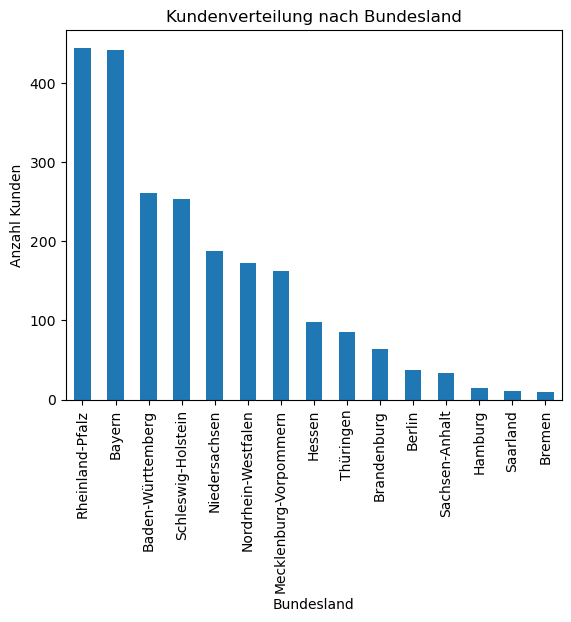

In [12]:
# 15. **Visualisiere Kundenverteilung nach Bundesland in einem Balkendiagramm.**

# 15. Visualisierung
# Bibliothek für Plotter
import matplotlib.pyplot as plt

merged["bundesland"].value_counts().plot(kind="bar", title="Kundenverteilung nach Bundesland")
# Bezeichnung der Achsen
plt.xlabel("Bundesland")
plt.ylabel("Anzahl Kunden")
#plt.tight_layout()
plt.show()
